# Local Tourism Authority

![](https://png.pngtree.com/element_origin_min_pic/16/09/07/1557cfbd8d4092f.jpg)

__Problem:__ The CEO of the local Tourism Authority would like to know whether a family’s annual expenditure on recreation is related to their annual income. This information could be used to tailor marketing campaigns to certain consumer segments.

To answer this probelm we will utilize __Linear Regression__ and build a statistical model to quantify the relationship between the two variables. This relationship is of interest as it allows us to gain an understanding of the problem, to make predictions, or assess new data in light of the relationship.


In [48]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv("./data/tourist.csv")
data.head()

,expenditure,income
0,2400,41200
1,2650,50100
2,2350,52000
3,4950,66000
4,3100,44500


So it appears we have 2 variables: `expenditures` and `income`. Since `expenditures` is likely to depend on a family's annual income, we will define `expenditures` as the __dependent / response variable (Y)__ and `income` as the __independent / explainatory variable (X)__. 

## Exploratory Data Anlaylsis

One of the first steps before getting into statistical modelling is to visualize the data. With 2 quantatiative variables, the best display is to use a __scatter plot__ to identify visual relationships. 

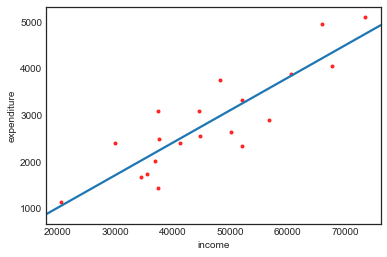

In [7]:
sns.regplot(data.income, data.expenditure, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

#### Scatter Plot Interpretation 
It can been seen that the relationship between income and expense has the following characteristics:

- __Direction:__ Positive _(i.e., as income increases so does expense)_
- __Shape:__ Roughly linear _(i.e., the points appear to fall along a straight line)_
- __Strength:__ Reasonably Strong _(i.e., there is considerable sfcatter about the linear line)_

We can also see the __linear regression model__ depectied were the linear stright line is the line connecting the average of the `y` values for each of the independent variable, `x`. 

## Correlation (Pearson's Correlation Coefficient)

Now that we have a visual depiction of the linearity of the data, we can quanitfy the strength of this linear relationship numerically using __correlation__, $\rho$ ("rho"). 

We will the `corr()` function to cacluate the sample correlation. 

In [8]:
data.corr()

,expenditure,income
expenditure,1.000000,0.875256
income,0.875256,1.000000


#### Interpretation
We get a correlation value of 0.875 which on a scale between +1, 0, and -1, this correlation is in fact quite strong. 

## Simple Linear Regression Model

So above when we plotted the scatter plot we added a parameter to also plot the __regression line__. This line is called the __Least Squares Regression (LSR) line__ and is used to determein the ebst line. Basically the best line will result in the smallest Residual Sum of Squares from all possible canidate lines. 

Now lets run the linear regression model using the `ols` command. 

In [10]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='expenditure ~ income', data = data).fit()

print(lm.params,'\n')

# summary of the regression coefficents
print(lm.summary())

Intercept   -372.645082
income         0.069572
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     58.95
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           4.38e-07
Time:                        19:30:27   Log-Likelihood:                -153.05
No. Observations:                  20   AIC:                             310.1
Df Residuals:                      18   BIC:                             312.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

#### ANOVA
In addition, we can lso aobstain the __ANOVA__ table by running `stats.anova_lm()` function. 

In [16]:
anova_results = sm.stats.anova_lm(lm)
print(anova_results)

            df        sum_sq       mean_sq          F        PR(>F)
income     1.0  1.701080e+07  1.701080e+07  58.947318  4.379584e-07
Residual  18.0  5.194374e+06  2.885763e+05        NaN           NaN


## Residuals
#### Standardized Residuals

[Per Statistics How To](https://www.statisticshowto.datasciencecentral.com/what-is-a-standardized-residuals/) Standardized residuals are very similar to the kind of standardization you perform earlier on in statistics with z-scores. Z-scores allow you to standardize normal distributions so that you can compare your values; standardized residuals normalize your data in regression analysis and chi square hypothesis testing. 


The standardized residuals can be obtained from the fitted bodel using the following function:

In [ ]:
TODO

#### studentized residuals

In [28]:
#Creating a dataframe that includes the studentized residuals
sm.regression.linear_model.OLSResults.outlier_test(lm)

,student_resid,unadj_p,bonf(p)
0,-0.174792,0.863308,1.0
1,-0.880388,0.390925,1.0
2,-1.825625,0.085526,1.0
3,1.539761,0.142025,1.0
4,0.709843,0.487425,1.0
5,0.471994,0.642933,1.0
6,0.781255,0.445397,1.0
7,1.764647,0.095581,1.0
8,-1.332427,0.200306,1.0
9,-0.677950,0.506927,1.0


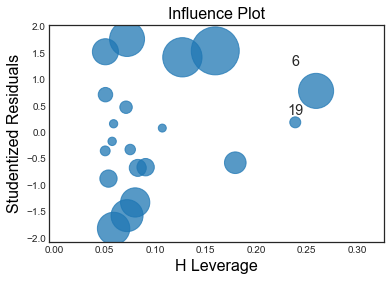

In [47]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks");

graph is the Leverage v.s. Studentized residuals plot. y axis(verticle axis) is the studentized residuals indicating if there is any outliers based on the alpha value(significace level).

## Model Diagnostics (Checking Assumptions)

Before we continue with Simple Linear Regression model building, there are several assumptions that need to be met for the linear regression model to be appropriate. 

1. Errors are statistically independent from each other

2. Errors have constant variance

3. Errors are normally distributed with mean 0

4. Straight line is appropriate


### Independence of Errors

This assumption can only be assessed by knowing how the data were collected. In essence, this assumption tries to ensure that each data point is unique in its own right and that no two data points convey the same information.

### Constant Variance of Errors
The assumption of constant variance of the errors states that the variability of the errors remains the same, irrespective of the value of the independent variable x.

Therefore, if we plotted the __residuals vs the observations $x$__ we should have a plot with __roughly equal scatter of residuals for all values of $x$__. In other words, ___a band of points with about constant width should be visible.__

We will use the `studentized residual plot` instead of the ordinary residual results our our linear model.

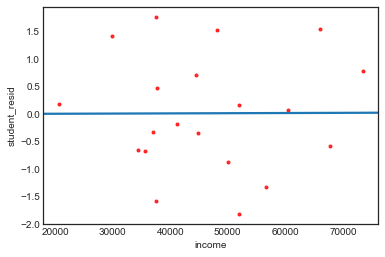

In [37]:
student_residuals = sm.regression.linear_model.OLSResults.outlier_test(lm)['student_resid']
sns.regplot(data.income, student_residuals, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

#### Interpretation of the Studentized Residual Plot

From the Studentized Residual Plot it can be concluded that the assumption of __constant variablity is appropriate__ since the residuals fall within a horizontal band which does not appear to change in width. 

### Normality of Errors

Normality is important as it enables us to make inferences about the parameter (e.g., regression coefficients). To test this assumption we will plot the data on a _Normal Probability Plot_, with the assumption that the __data are random sample from a Normal distribution_.

We will plot the Normal Probability Plot of the residuals from the linear regression fitted model using `statsmodels` `qqplot()` function.

Text(0.5,1,'QQ Plot')

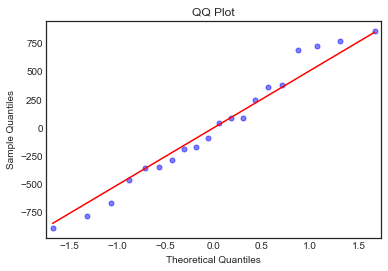

In [26]:
# statsmodels Q-Q plot on model residuals
qq = sm.ProbPlot(lm.resid)
fig = qq.qqplot(alpha=0.5, markersize=5, line='s')
plt.title("QQ Plot")

##### Interpretation
We can see that residuals fall generally fairly close to a stright line and thus it can be concluded that the __assumption of normality is met__. 

However, perhaps we were skeptical about the this observational fit on the linear line, suppose we ask _"How close must the residuals be to the straight line in order for the normality assumption to be acceptable?"_

###### Shapiro-Wilk Test
To suppliment the analysis of normality, we can use the __Shapiro Test__ for normality to assess whether the residuals are significantly different from a Normal distribution; as such:

In [41]:
# normality test using the Shapiro Test
stat, p = stats.shapiro(lm.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9642, p=0.6303


The results show the residuals can be considered to come from a normal distribution (due to the large p-value)

### Straight Line is Appropriate

The __studentized residual plot__ is also used to assess the assumption that a straight line is appropriate. Howerever the way we look at this plot is with the interest of __any patterns which suggest that a straight line is not appropriate__ such as evidence of curvature in the residual plot.

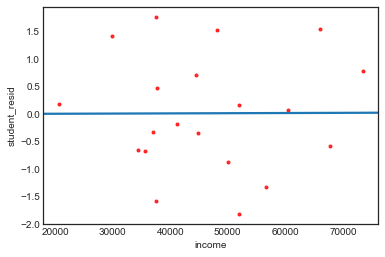

In [43]:
student_residuals = sm.regression.linear_model.OLSResults.outlier_test(lm)['student_resid']
sns.regplot(data.income, student_residuals, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

#### Interpretation

Similar to _constant variance assumption_, the data shows __no pattern is apparent__ from the studentized residual plot. Therefore, we can conclude that this __assumption is met__.

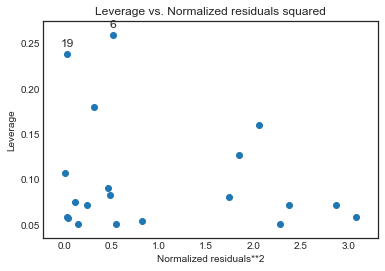

In [45]:
sm.graphics.plot_leverage_resid2(lm);

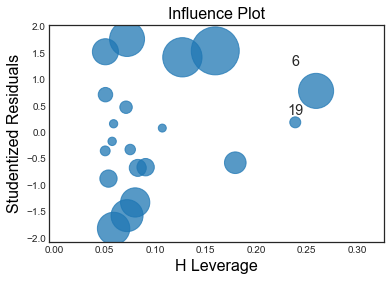

In [46]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks");

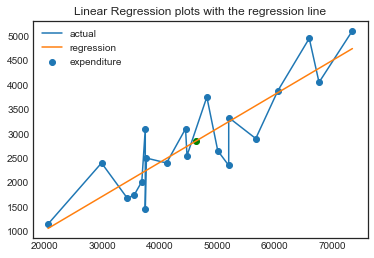

In [53]:
plt.scatter(data.income, data.expenditure)
plt.scatter(np.mean(data.income), np.mean(data.expenditure), color = "green")
plt.plot(np.sort(data.income), data.expenditure[np.argsort(data.income)], label = "actual")
plt.plot(np.sort(data.income), lm.predict()[np.argsort(data.income)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

use the `ols model` to get an instance of Influence with influence and outlier measures.

In [70]:
infl = lm.get_influence().summary_frame()
infl

,dfb_Intercept,dfb_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.026150,0.015687,0.000987,-0.179698,0.057591,-0.044422,-0.174792,-0.043209
1,-0.000807,-0.057027,0.022388,-0.885941,0.053969,-0.211605,-0.880388,-0.210279
2,0.056316,-0.178891,0.092556,-1.717703,0.059035,-0.430245,-1.825625,-0.457277
3,-0.431655,0.556336,0.209348,1.484278,0.159699,0.647067,1.539761,0.671255
4,0.066829,-0.022923,0.013920,0.719832,0.050990,0.166854,0.709843,0.164539
5,0.098939,-0.071590,0.008946,0.482526,0.071364,0.133763,0.471994,0.130844
6,-0.343744,0.415560,0.109318,0.789851,0.259508,0.467585,0.781255,0.462496
7,0.376044,-0.273979,0.108690,1.669341,0.072361,0.466240,1.764647,0.492858
8,0.147489,-0.242227,0.074396,-1.304625,0.080392,-0.385737,-1.332427,-0.393957
9,-0.167120,0.128556,0.021437,-0.688362,0.082974,-0.207060,-0.677950,-0.203928


Now we can get the `hat values` obtained in the column

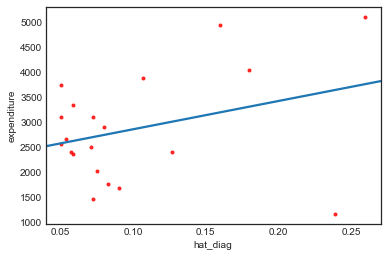

In [71]:
sns.regplot(infl.hat_diag, data.expenditure, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

http://www.statsmodels.org/devel/examples/notebooks/generated/robust_models_1.html

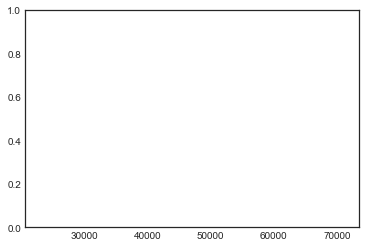

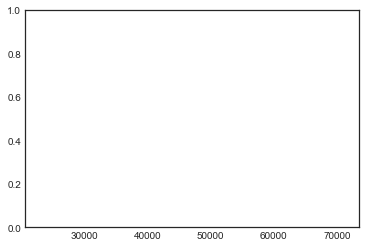

In [73]:
sm.graphics.abline_plot(model_results=lm)